In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
species = pd.read_csv("species_info.csv")
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
species_count = species['scientific_name'].unique
species_count

<bound method Series.unique of 0       Clethrionomys gapperi gapperi
1                           Bos bison
2                          Bos taurus
3                          Ovis aries
4                      Cervus elaphus
                    ...              
5819                 Solanum parishii
5820                    Solanum xanti
5821           Parthenocissus vitacea
5822                Vitis californica
5823              Tribulus terrestris
Name: scientific_name, Length: 5824, dtype: object>

In [7]:
species_type = species['category'].unique()
species_type

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [9]:
conservation_statuses = species['conservation_status'].unique()
conservation_statuses

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
category_counts = species.groupby(['category'])['scientific_name'].nunique().reset_index()
category_counts

,category,scientific_name
0,Amphibian,79
1,Bird,488
2,Fish,125
3,Mammal,176
4,Nonvascular Plant,333
5,Reptile,78
6,Vascular Plant,4262


In [11]:
category_counts.sort_values('scientific_name', ascending=False).reset_index()

,index,category,scientific_name
0,6,Vascular Plant,4262
1,1,Bird,488
2,4,Nonvascular Plant,333
3,3,Mammal,176
4,2,Fish,125
5,0,Amphibian,79
6,5,Reptile,78


In [14]:
conservation_counts = species.groupby(['conservation_status'])['scientific_name'].nunique().reset_index()
conservation_counts.sort_values('scientific_name', ascending=False).reset_index()

,index,conservation_status,scientific_name
0,2,Species of Concern,151
1,0,Endangered,15
2,3,Threatened,10
3,1,In Recovery,4


In [19]:
species.fillna('No Intervention', inplace = True)

In [18]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention


In [20]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [25]:
conservation_counts_fixed = species.groupby(['conservation_status'])['scientific_name'].nunique().reset_index()
conservation_counts_fixed.sort_values('scientific_name', ascending=False)

,conservation_status,scientific_name
2,No Intervention,5363
3,Species of Concern,151
0,Endangered,15
4,Threatened,10
1,In Recovery,4


In [29]:
protection_counts = species.groupby('conservation_status').scientific_name.count().reset_index().sort_values(by='scientific_name')
protection_counts.sort_values('scientific_name', ascending=False)

,conservation_status,scientific_name
2,No Intervention,5633
3,Species of Concern,161
0,Endangered,16
4,Threatened,10
1,In Recovery,4


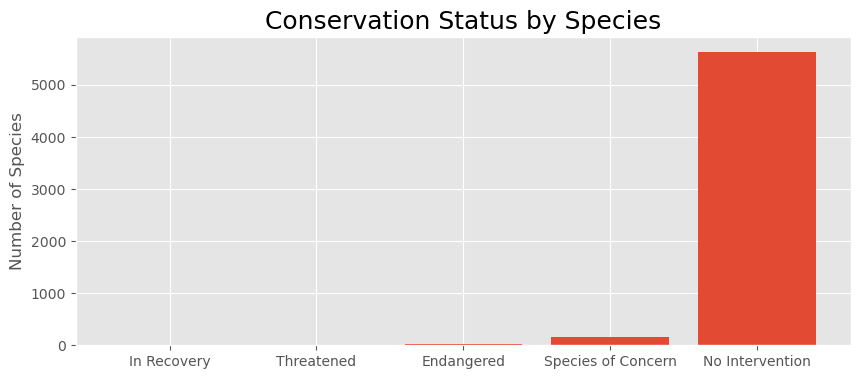

In [43]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
ax = plt.subplot()
plt.bar(range(len(protection_counts['conservation_status'])), protection_counts['scientific_name'])
ax.set_xticks(range(len(protection_counts['conservation_status'])))
ax.set_xticklabels(protection_counts['conservation_status'])
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species', fontdict={'fontsize':18})
plt.show()

In [45]:
species['is_protected'] = species['conservation_status'] != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [56]:
category_count = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index()
category_count.sort_values('scientific_name', ascending = False).head()

,category,is_protected,scientific_name
12,Vascular Plant,False,4216
2,Bird,False,413
8,Nonvascular Plant,False,328
6,Mammal,False,146
4,Fish,False,115


In [61]:
category_pivot = category_count.pivot(columns = 'is_protected',
                                      index = 'category',
                                      values = 'scientific_name').reset_index()
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [65]:
contingency = [[30, 146], [75, 413]]
from scipy.stats import chi2_contingency

_, pval ,_, _ = chi2_contingency(contingency)
pval

0.6875948096661336

In [67]:
contingency_reptile = [[30, 146], [5, 73]]
_, pval_reptile_mammal ,_, _ = chi2_contingency(contingency_reptile)
pval_reptile_mammal

0.03835559022969898

In [69]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [71]:
species['is_sheep'] = species['common_names'].apply(lambda x: True if 'Sheep' in x else False)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [73]:
species_is_sheep = species[(species['is_sheep'] == True)]
species_is_sheep

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [75]:
sheep_species = species[ (species['is_sheep'] == True) & (species['category'] == 'Mammal')]
sheep_species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [77]:
sheep_observations = sheep_species.merge(observations)
sheep_observations

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


In [78]:
obs_by_park = sheep_observations.groupby(['park_name'])['observations'].sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


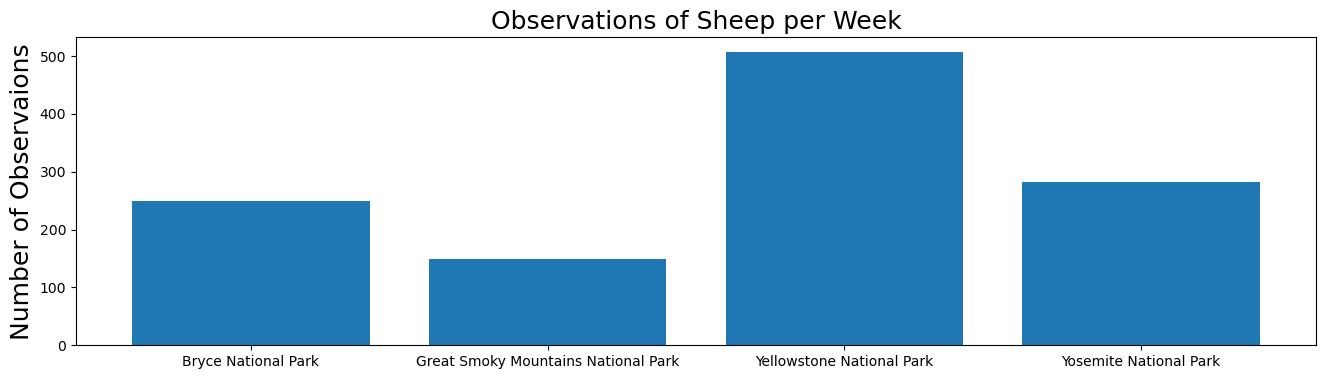

In [82]:
plt.figure(figsize=(16,4))
plt.style.use('default')
ax = plt.subplot()
plt.bar(range(len(obs_by_park['park_name'])), obs_by_park['observations'])
ax.set_xticks(range(len(obs_by_park['park_name'])))
ax.set_xticklabels(obs_by_park['park_name'])
plt.ylabel('Number of Observaions', fontdict={'fontsize':18})
plt.title('Observations of Sheep per Week', fontdict={'fontsize':18})
plt.show()

In [86]:
baseline = 15

minimum_detectable_effect = 5/15

sample_size_per_variant = 510

bryce_weeks_observing = sample_size_per_variant/250

yellowstone_weeks_observing = sample_size_per_variant/507

In [87]:
bryce_weeks_observing

2.04

In [88]:
yellowstone_weeks_observing

1.0059171597633136